# Sentiment Analysis using NLTK 
## Vader Model With Bag or words aproach

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

## Reading and processing the data frame

In [2]:
df = pd.read_csv("/kaggle/input/amazon-fine-food-reviews/Reviews.csv")
print(df.shape)
# Now lets shorten the data cause nltk pretained model sed life
df = df.head(500)


(568454, 10)


## Quick EDA

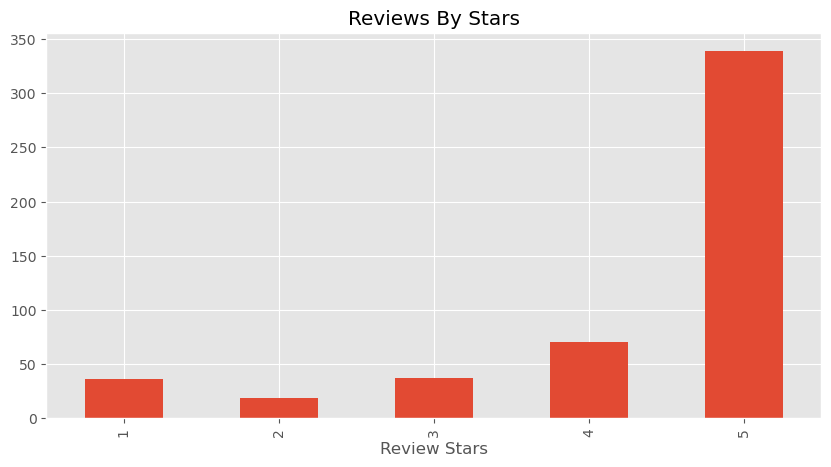

1     36
2     18
3     37
4     70
5    339
Name: Score, dtype: int64


In [19]:
df.head()
# Data off all the scores which coresponds to happines i guess
# Value Counts here give unique value might help in classification 
ax = df['Score'].value_counts().sort_index()

ax.plot(
    kind='bar',
    title="Reviews By Stars",
    figsize=(10,5),
).set_xlabel('Review Stars')

# ax
# ax.set_xlabel('Reviews Star')

plt.show()
print(ax)

### Now We can assume that number of stars are comparable to happy

In [22]:
# Now come word tokenization
example = df['Text'][150]
tokens = nltk.word_tokenize(example)
print(tokens)

['This', 'is', 'a', 'fabulous', 'marinade', '!', 'I', 'love', 'to', 'use', 'it', 'for', 'chicken', ',', 'either', 'baked', 'in', 'the', 'oven', 'OR', 'on', 'the', 'grill', '.', 'This', 'has', 'enough', 'flavor', '&', 'flair', ',', 'I', "'ve", 'even', 'used', 'it', 'for', 'dinner', 'parties', ',', 'only', 'to', 'receive', 'rave', 'reviews', 'from', 'my', 'guests', '!', '!', 'DEFINITELY', 'worth', 'the', 'price', '!', 'Super', 'cheap', 'and', 'super', 'easy', '!', 'Love', 'it', '!']


In [23]:
# Now lets give nltk model a post tag
tagged = nltk.pos_tag(tokens)
tagged[:10]


[('This', 'DT'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('fabulous', 'JJ'),
 ('marinade', 'NN'),
 ('!', '.'),
 ('I', 'PRP'),
 ('love', 'VBP'),
 ('to', 'TO'),
 ('use', 'VB')]

### This converts tokens into entity using NER (Name entity recognition)

In [24]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  is/VBZ
  a/DT
  fabulous/JJ
  marinade/NN
  !/.
  I/PRP
  love/VBP
  to/TO
  use/VB
  it/PRP
  for/IN
  chicken/NN
  ,/,
  either/DT
  baked/VBN
  in/IN
  the/DT
  oven/NN
  OR/NNP
  on/IN
  the/DT
  grill/NN
  ./.
  This/DT
  has/VBZ
  enough/JJ
  flavor/NN
  &/CC
  flair/NN
  ,/,
  I/PRP
  've/VBP
  even/RB
  used/VBN
  it/PRP
  for/IN
  dinner/NN
  parties/NNS
  ,/,
  only/RB
  to/TO
  receive/VB
  rave/VB
  reviews/NNS
  from/IN
  my/PRP$
  guests/NNS
  !/.
  !/.
  DEFINITELY/NNP
  worth/IN
  the/DT
  price/NN
  !/.
  Super/NNP
  cheap/NN
  and/CC
  super/JJ
  easy/NN
  !/.
  Love/VB
  it/PRP
  !/.)


## We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

 ## This uses a "bag of words" approach:
   1. Stop words are removed
   1. each word is scored and combined to a total score.

In [29]:
# this is already an pretrained model sed we will train our own using rnn in other kaggle file

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()


In [30]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

### Running popularity score in the entire dataset

In [31]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [38]:
print(pd.DataFrame(res))
print(pd.DataFrame(res).T)

             1       2       3    4       5      6       7       8       9    \
neg       0.0000  0.0790  0.0910  0.0  0.0000  0.029  0.0340  0.0000  0.0000   
neu       0.6950  0.8530  0.7540  1.0  0.5520  0.809  0.6930  0.5200  0.8510   
pos       0.3050  0.0680  0.1550  0.0  0.4480  0.163  0.2730  0.4800  0.1490   
compound  0.9441 -0.1027  0.8265  0.0  0.9468  0.883  0.9346  0.9487  0.6369   

             10   ...     491     492     493     494     495     496     497  \
neg       0.0000  ...  0.0550  0.0000  0.0560  0.0860  0.0000  0.0000  0.0590   
neu       0.7050  ...  0.7040  0.7170  0.8550  0.7030  0.7880  0.5540  0.7910   
pos       0.2950  ...  0.2410  0.2830  0.0890  0.2110  0.2120  0.4460  0.1500   
compound  0.8313  ...  0.9287  0.9367  0.5976  0.4939  0.9743  0.9725  0.8215   

             498    499     500  
neg       0.0250  0.041  0.0000  
neu       0.7620  0.904  0.6780  
pos       0.2120  0.055  0.3220  
compound  0.9848  0.128  0.9811  

[4 rows x 500 columns]

### If you look above at the pregress bar its given by tqdm thanks tqdm

In [41]:
# Now add vader model to main dataset but first transposing to fit original dimension
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [42]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.079,0.853,0.068,-0.1027,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


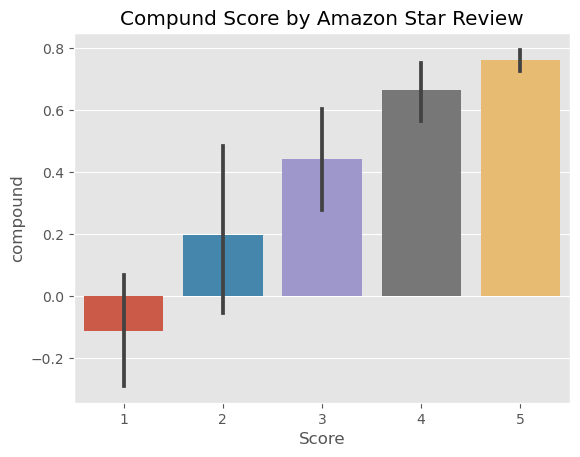

In [43]:
# Now using sns bar-plot plot data to its value

ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()



### So That means its comperable to real life responce using pre trained model :(

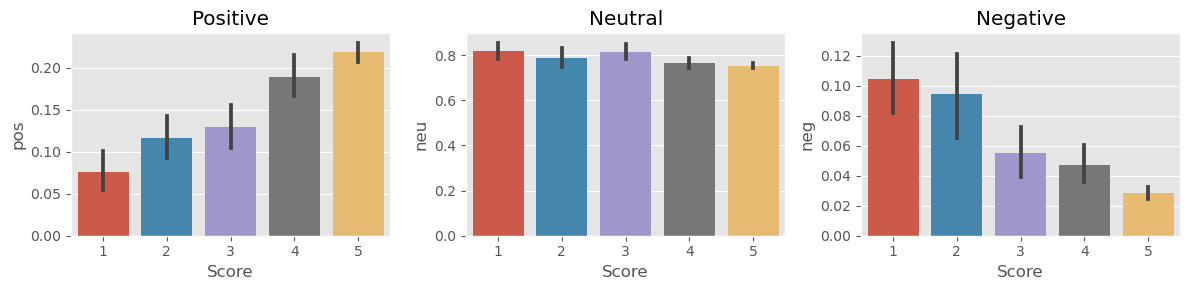

In [45]:
# finally lets plot and check with positive neagtive and nuetral

fig, axs = plt.subplots(1, 3, figsize=(12, 3))

sns.barplot(data=vaders, x='Score', y='pos',ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu',ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg',ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()


# So Done model legit